# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case. 

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$). 
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [1]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

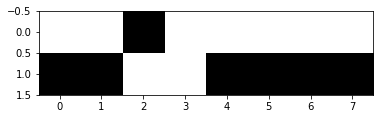

In [2]:
plt.set_cmap('gray')
 
sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1 
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1 


$$U(x) = \sum V_c(s) = \sum V_c(x_s, s \in c) = 11\beta$$

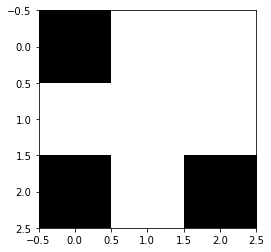

In [4]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2 

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2


For the 8-neignborhood, there are 8 cliques with ordre equals to 2. 
$$U_s(x_s,V_s) = \sum_{c\in C. s\in c}V_c(s_s,V_s)$$

Therefore $U_s(0|V_s) = 5\beta$ et $U_s(1|V_s) = 3\beta$

Therefore $Z^s = \sum_{\delta \in \{0,1\}}\exp(-U_s(\delta,V_s)) = \exp(-5\beta) + \exp(-3\beta)$

$$ Pr(X_s = 0 | V_s) = \frac{\exp(-5\beta)}{\exp(-5\beta) + \exp(-3\beta)}$$
$$ Pr(X_s = 1 | V_s) = \frac{\exp(-3\beta)}{\exp(-5\beta) + \exp(-3\beta)}$$

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models 



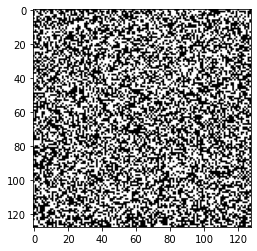

In [5]:
plt.set_cmap('gray')
 
sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [30]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=beta_reg*(int(im_bin[i1,j] != 0)+int(im_bin[i2,j] != 0)+int(im_bin[i,j1] != 0)+int(im_bin[i,j2] != 0))
            #print(type(Ureg0))
            p0=math.exp(-Ureg0)

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=beta_reg*(int(im_bin[i1,j] != 1)+int(im_bin[i2,j] != 1)+int(im_bin[i,j1] != 1)+int(im_bin[i,j2] != 1))
            p1=math.exp(-Ureg1)

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

 
By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

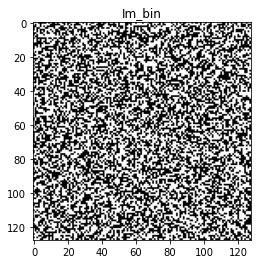

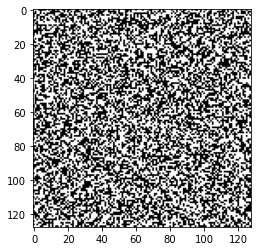

Begin echan


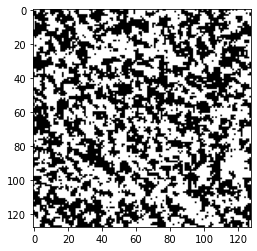

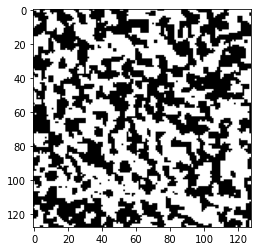

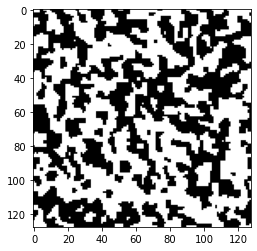

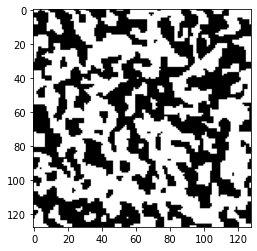

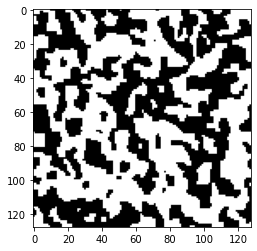

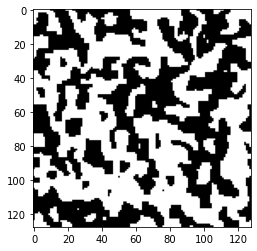

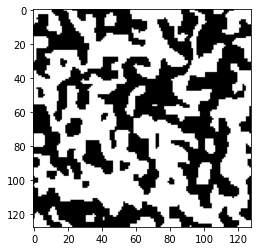

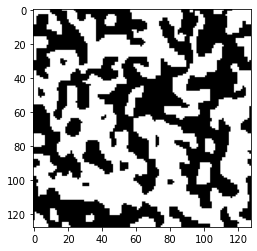

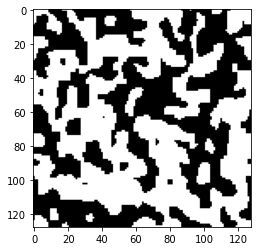

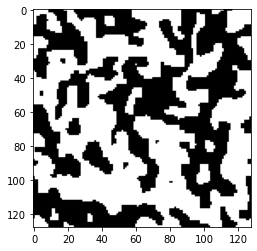

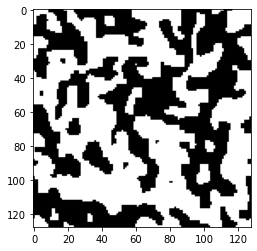

In [47]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.title("Im_bin")
plt.imshow(im_bin)

beta_reg=100

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

print("Begin echan")
for n in range(10):  
    echan(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)

plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3

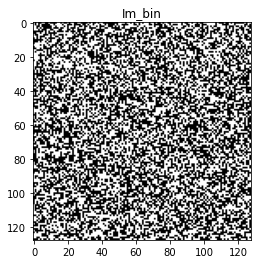

In [48]:
im_bin_list = []
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.title("Im_bin")
plt.imshow(im_bin)

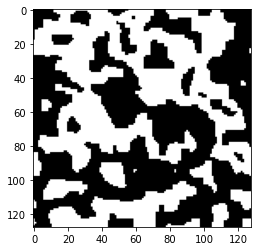

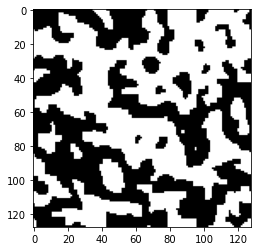

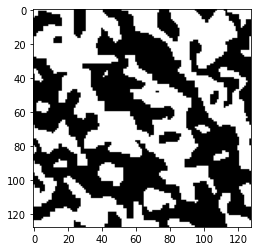

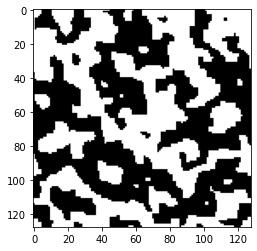

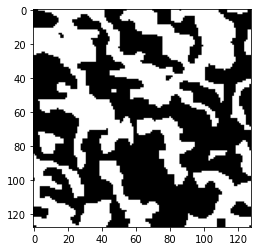

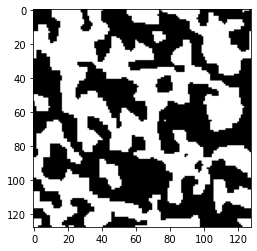

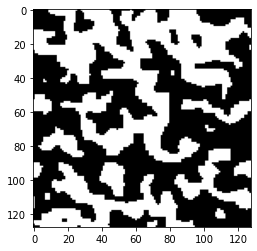

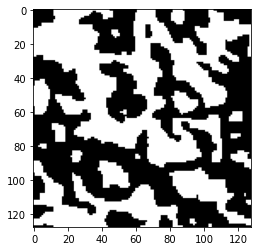

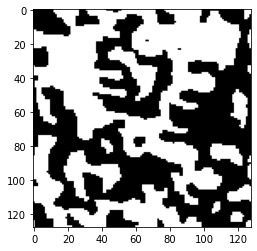

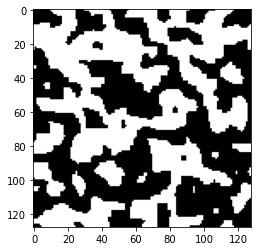

[[[-1.  0. -1. ...  0. -1. -1.]
  [-1.  0. -1. ...  0. -1.  0.]
  [-1. -1.  0. ... -1.  0.  0.]
  ...
  [ 0.  0. -1. ...  0.  0.  0.]
  [ 0. -1.  0. ...  1.  0.  1.]
  [ 0.  0.  0. ...  1.  0.  0.]]

 [[-1.  0. -1. ...  1.  0. -1.]
  [-1.  0. -1. ...  1.  0.  0.]
  [-1. -1.  0. ...  0.  0.  0.]
  ...
  [ 0.  0. -1. ...  0.  0.  0.]
  [ 0.  0.  0. ...  1.  0.  1.]
  [ 1.  1.  0. ...  1.  0.  0.]]

 [[ 0.  1.  0. ...  1.  0.  0.]
  [ 0.  1.  0. ...  1.  0.  1.]
  [ 0.  0.  1. ...  0.  1.  1.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  1. ...  1.  0.  1.]
  [ 1.  1.  1. ...  1.  0.  0.]]

 ...

 [[-1.  0. -1. ...  0. -1. -1.]
  [-1.  0. -1. ...  0. -1.  0.]
  [-1. -1.  0. ... -1.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  1. ...  1.  0.  1.]
  [ 0.  0.  0. ...  0. -1. -1.]]

 [[-1.  0. -1. ...  1.  0.  0.]
  [-1.  0. -1. ...  1.  0.  1.]
  [-1. -1.  0. ...  0.  1.  1.]
  ...
  [ 0. -1. -1. ...  0.  0.  0.]
  [ 0. -1.  0. ...  1.  0.  1.]
  [ 1.  0.  0. ...  1.  0.  

In [49]:
im_bin_copy  = im_bin.copy()
for k in range(10):
    for n in range(10):  
        echan(im_bin_copy,beta_reg) 
        #plt.imshow(im_bin)      
        mafigure.canvas.draw()
        #plt.show(block=False)
    plt.imshow(im_bin_copy)
    plt.show(block=False)     
    im_bin_list.append(im_bin_copy)
    im_bin_copy = im_bin.copy()
    
    
diff = np.subtract(im_bin_list,im_bin)
print(diff)

We runned the program 10 times, and we found that the difference of them is 0.038, donc these images are different. This is because each pixel are choosed base on a random process based on a specific distribution which depends on the local energy. 

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results. 

#A4

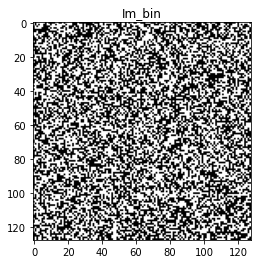

In [50]:
im_bin_list = []
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.title("Im_bin")
plt.imshow(im_bin)

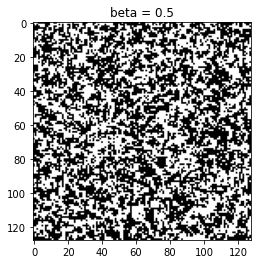

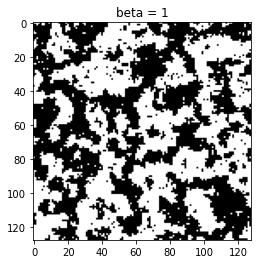

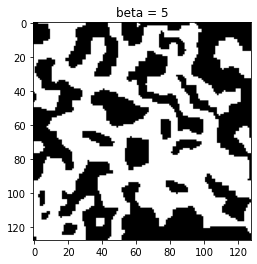

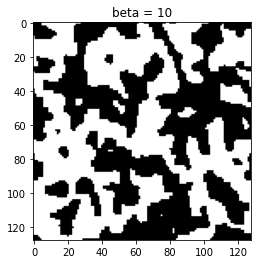

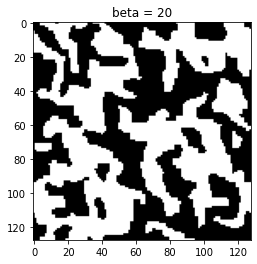

In [51]:
im_bin_copy  = im_bin.copy()


for beta_reg in [0.5,1,5,10,20]:
    for n in range(10):  
        echan(im_bin_copy,beta_reg) 
        #plt.imshow(im_bin)      
        mafigure.canvas.draw()
        #plt.show(block=False)
    plt.imshow(im_bin_copy)
    plt.title("beta = {}".format(beta_reg))
    plt.show(block=False)     
    im_bin_list.append(im_bin_copy)
    im_bin_copy = im_bin.copy()


We can observe a more structured image with bigger beta (that is to say, with a bigger group of same pixel)

#Q5 
Which image minimizes the overall energy for this model? 

#A5


In our experiments, image with the biggest beta is the image minimizing the overall energy for this model.Because the higher the beta is, the more structued the image becomes, and the lower the energy is.
Theoretically, a image all white or all black is the image minimizing the overall energy.

#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

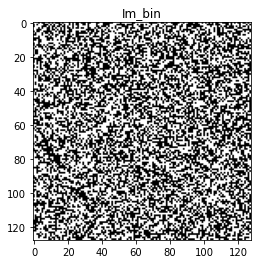

In [52]:
im_bin_list = []
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.title("Im_bin")
plt.imshow(im_bin)

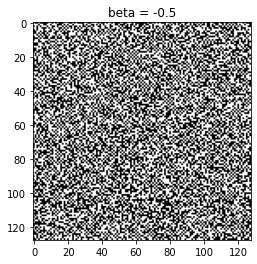

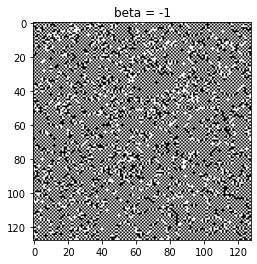

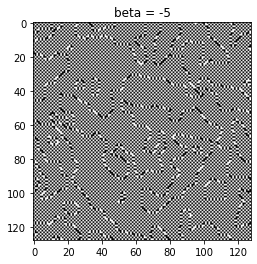

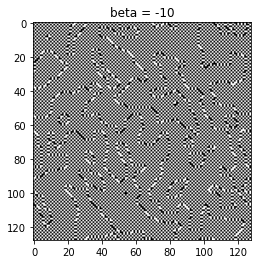

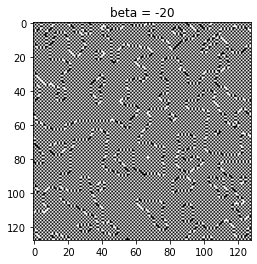

In [53]:
im_bin_copy  = im_bin.copy()


for beta_reg in [-0.5,-1,-5,-10,-20]:
    for n in range(10):  
        echan(im_bin_copy,beta_reg) 
        #plt.imshow(im_bin)      
        mafigure.canvas.draw()
        #plt.show(block=False)
    plt.imshow(im_bin_copy)
    plt.title("beta = {}".format(beta_reg))
    plt.show(block=False)     
    im_bin_list.append(im_bin_copy)
    im_bin_copy = im_bin.copy()


We find that there are many checkerboard-style pixels in the image, staggered in black and white. Because when beta becomes negetive, the renewed pixel tend to become different from other 4-connected pixels, which can minimize the energy. Theoretically, an image with all checkerboard-style pixels has the minimum energy.

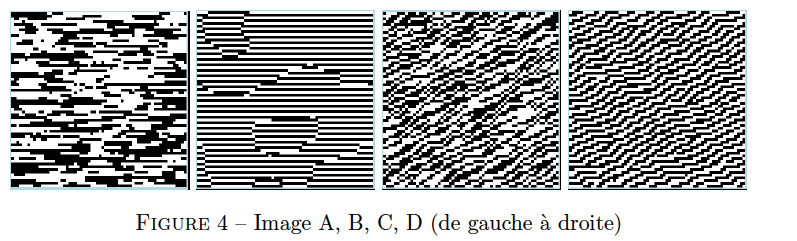

#Q7 
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero. 


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





#A7

We denote the 8-neighborhood as following:
$$a e b$$$$h s f$$$$d g c$$

Image A: h&f is -1

Image B: h&f is -1, e&g is 1

Image C: h&f is -1, e&g is 1, a&c is -1

Image D: h&f is -1, e&g is 1, a&c is -1，b&d is 1, 

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). Comment on the result. 

#A8

In [42]:
def echan_new(im_bin):

    i=0
    j=0
    beta_reg1 = -1 #hf
    beta_reg2 = 1 #eg
    beta_reg3 = -1 #ac
    beta_reg4 = 1 #bd

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=beta_reg1*(int(im_bin[i1,j] != 0)+int(im_bin[i2,j] != 0)) +beta_reg2*(int(im_bin[i,j1] != 0)+int(im_bin[i,j2] != 0)) + beta_reg3*(int(im_bin[i1,j1] != 0)+int(im_bin[i2,j2] != 0)) +beta_reg4*(int(im_bin[i1,j2] != 0)+int(im_bin[i2,j1] != 0))
            #print(type(Ureg0))
            p0=math.exp(-Ureg0)

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=beta_reg1*(int(im_bin[i1,j] != 1)+int(im_bin[i2,j] != 1)) +beta_reg2*(int(im_bin[i,j1] != 1)+int(im_bin[i,j2] != 1)) + beta_reg3*(int(im_bin[i1,j1] != 1)+int(im_bin[i2,j2] != 1)) +beta_reg4*(int(im_bin[i1,j2] != 1)+int(im_bin[i2,j1] != 1))
            p1=math.exp(-Ureg1)

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

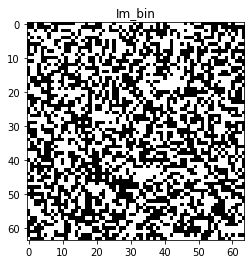

In [36]:
plt.set_cmap('gray')
sh=[64,64]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.title("Im_bin")
plt.imshow(im_bin)

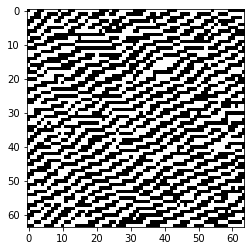

Begin echan


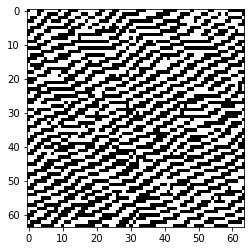

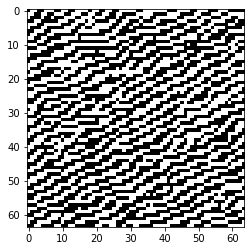

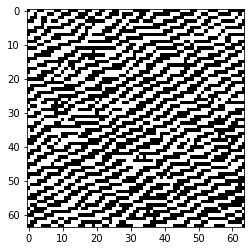

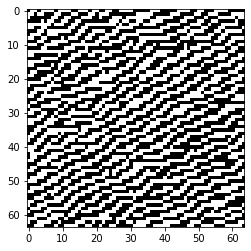

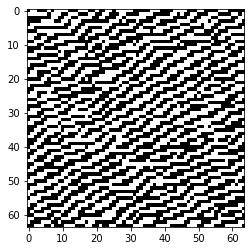

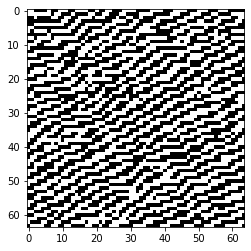

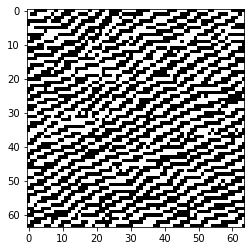

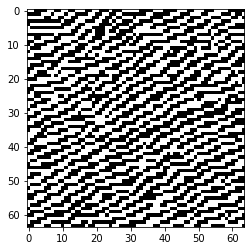

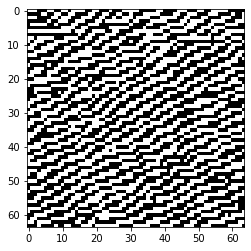

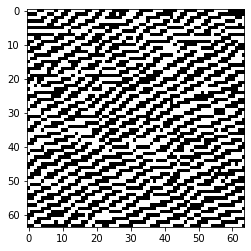

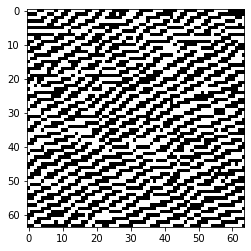

In [46]:
beta_reg=100

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

print("Begin echan")
for n in range(10):  
    echan_new(im_bin) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)

plt.figure()
plt.imshow(im_bin)
plt.show()

From this experiment, we found that the stable state of this image tends to be more similar to the diagonal (clockwise 45 degrees) and vertical pixels, and is extended in a stepwise fashion on the diagonal(clockwise 45 degrees). 